In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import numpy as np
import scanpy as sc
from pathlib import Path
import wandb, pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, FixedLocator
import json
from matplotlib import ticker as mticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.stats import ttest_rel, wilcoxon, shapiro
from statsmodels.stats.multitest import multipletests

In [5]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

fm.fontManager.addfont('/work/magroup/skrieger/Arial.ttf')
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial']

sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme(style="white")  


fg_order = ["ESM2", "Gene2Vec", "GenePT", "HyenaDNA", "Random"]
fe_order = ["Sorting", "Binning", "Autobin", "Continuous"]

fg_order = ["ESM2", "Gene2Vec", "GenePT", "HyenaDNA", "Random"]
fe_order = ["Sorting", "Binning", "Autobin", "Continuous"]
base_palette = sns.color_palette("Set2", 5)
fg_color_map = dict(zip(fg_order, base_palette))

## Example experimental config

In [11]:
import hydra

In [15]:
with hydra.initialize(version_base=None, config_path="../Heimdall/config"):                                                                                                                                                                                                                             
    config = hydra.compose(                                                                    
        config_name="config",                                                                  
        overrides=[                                                                            
            # "+experiments_dev=classification_experiment_dev",                                
            "+experiments=pretraining",                                              
            "user=lane-shared",                                                             
            # "model=transformer",                                                               
            "fg=identity",                                                                     
            # "fe=identity",                                                                     
            # "fc=uce",                                                                          
            # "seed=55",                                                                         
            # "project_name=demo",                                                               
            # "tasks.args.epochs=1",                                                             
            # "fc.args.max_input_length=512",                                                    
            # "fc.args.tailor_config.args.sample_size=450",                                      
            # f"user={os.environ['HYDRA_USER']}"                                               
        ],                                                                                     
    )                      

<h2>Panel B</h2>

In [6]:
mcc_scores = {
    "scbert": [0.40542549, 0.40577033, 0.3938868, 0.39451945, 0.38319486, 0.386163, 0.40650868, 0.36560529, 0.38358983, 0.39666566],
    "scgpt": [0.37403581, 0.3806394, 0.38813895, 0.37018248, 0.3935039, 0.38438174, 0.36843535, 0.38022932, 0.3999722, 0.36749345],
    "uce":    [0.35942012, 0.346764, 0.34255117, 0.35606822, 0.35656801, 0.33357412, 0.36308002, 0.36683327, 0.36433268, 0.36103368],
    "scfound": [0.40608439, 0.36971933, 0.39679688, 0.39679688, 0.37105134, 0.39717409, 0.41123158, 0.38035077, 0.3947041, 0.36954707],
    "geneformer": [0.42487139, 0.37648052, 0.39124551, 0.41120481, 0.38607112, 0.41667768, 0.42427304, 0.40444368, 0.35660893, 0.43301067]
}

In [7]:
def plot_mcc_dict(mcc_dict, title="MCC Comparison", save_prefix="mcc_plot"):
    # --- 1. customise the display names here ---
    pretty_name = {
        "scbert":     "scBERT",
        "scgpt":      "scGPT",
        "uce":        "UCE",
        "scfound":    "scFoundation",
        "geneformer": "Geneformer"
    }

    # --- 2. flatten dict into a DataFrame (unchanged) ---
    data = [
        {"method": m, "mcc": s}
        for m, scores in mcc_dict.items()
        for s in scores
    ]
    df = pd.DataFrame(data)

    plt.figure(figsize=(6, 6), facecolor='white')
    ax = sns.barplot(
        data=df,
        x="method",
        y="mcc",
        order=method_order,
        palette=custom_color_map,
        errorbar="sd",
        capsize=0.1,
        err_kws={"color": "black", "linewidth": 1.5}
    )

    ax.set_xticklabels([pretty_name.get(t.get_text(), t.get_text())
                        for t in ax.get_xticklabels()],
                       rotation=0, ha='center')
    ax.axhline(
        y=0.404,
        linestyle="-",
        color="red",
        linewidth=1.5,
        label="Baseline"
    )

    ax.set_ylim(0.0, 0.45)
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
    ax.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4'])
    
    ax.minorticks_off()  # disables all minor ticks on this axes
    ax.tick_params(axis='y', which='major', length=6, width=1, direction='out')
    
    ax.spines['right'].set_visible(True)
    ax.yaxis.set_ticks_position('right')
    
        
    ax.set_title(title)
    ax.set_xlabel("")         
    ax.set_ylabel("MCC")

    plt.tight_layout()
    plt.savefig(f"/path/to/file/{save_prefix}.pdf", facecolor='white')
    plt.show()



/tmp/ipykernel_1630170/909150894.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_1630170/909150894.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([pretty_name.get(t.get_text(), t.get_text())


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/file/panelB.pdf'

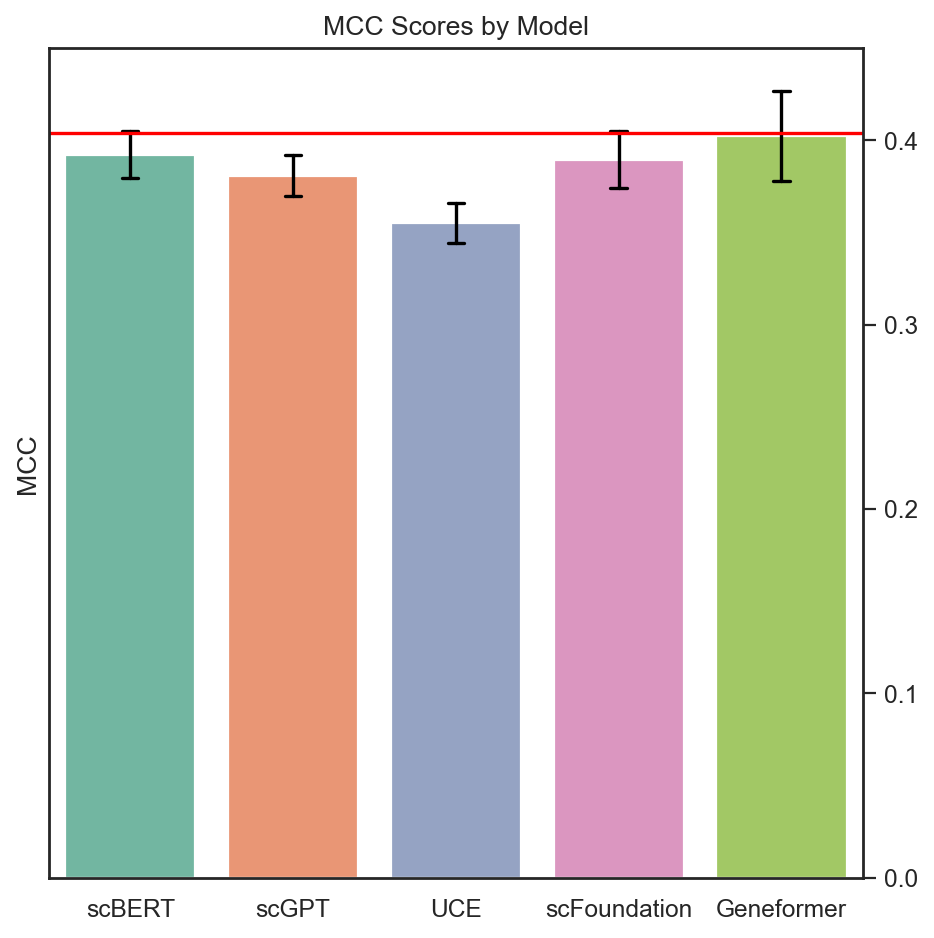

In [8]:
# Define method order and color palette
method_order = ["scbert", "scgpt", "uce", "scfound", "geneformer"]
base_palette = sns.color_palette("Set2", len(method_order))
custom_color_map = dict(zip(method_order, base_palette))

plot_mcc_dict(mcc_scores, title="MCC Scores by Model", save_prefix="panelB")


<h2> Panel C</h2>

In [16]:
mcc_100k = {
    "scbert": [0.41443637, 0.39001432, 0.40785301, 0.37339118, 0.40645787],
    "scgpt": [0.39668757, 0.40215075, 0.40748101, 0.40587965, 0.37475973],
    "uce": [0.40455985, 0.43578592, 0.37175941, 0.41407731, 0.42215466],
    "scfound": [0.4138284, 0.37953344, 0.46441981, 0.4263047, 0.41414624],
    "geneformer": [0.36963466, 0.41265401, 0.39247578, 0.4237754, 0.42071059]
}
mcc_10k = {
    "scbert": [0.42473561, 0.36889809, 0.37659919, 0.4152602, 0.43368548],
    "scgpt": [0.40134329, 0.39731589, 0.42571124, 0.39684805, 0.40346521],
    "uce": [0.38581407, 0.38046348, 0.37941763, 0.37196869, 0.38979536],
    "scfound": [0.4138284, 0.37953344, 0.46441981, 0.4263047, 0.41414624],
    "geneformer": [0.36963466, 0.41265401, 0.39247578, 0.4237754, 0.42071059]
}
mcc_no_pretrain = {
    "scbert": [0.3873, 0.409, 0.3895, 0.4067, 0.3889],
    "scgpt":  [0.4052, 0.4295, 0.4377, 0.4051, 0.4203],
    "uce":    [0.3737, 0.3715, 0.3454, 0.3843, 0.3862],
    "scfound":[0.40108049, 0.4050808, 0.3979961, 0.435121, 0.42230615],
    "geneformer":[0.3758941, 0.42751783, 0.3725684, 0.39150587, 0.42071059]
}
mcc_1mill = {
    "scbert": [0.3816708, 0.40656766, 0.38771576, 0.4382388, 0.39739144],
    "scgpt":  [0.40504214, 0.39573494, 0.40139842, 0.40156147, 0.38757405],
    "uce":    [0.39585003, 0.37133509, 0.38462231, 0.36768845, 0.38736421],
    "scfound":[0.38988772, 0.42567825, 0.37718353, 0.41007054, 0.42672506],
    "geneformer":[0.37335625, 0.39808658, 0.42283866, 0.41334763, 0.42808908]
}


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/file.pdf'

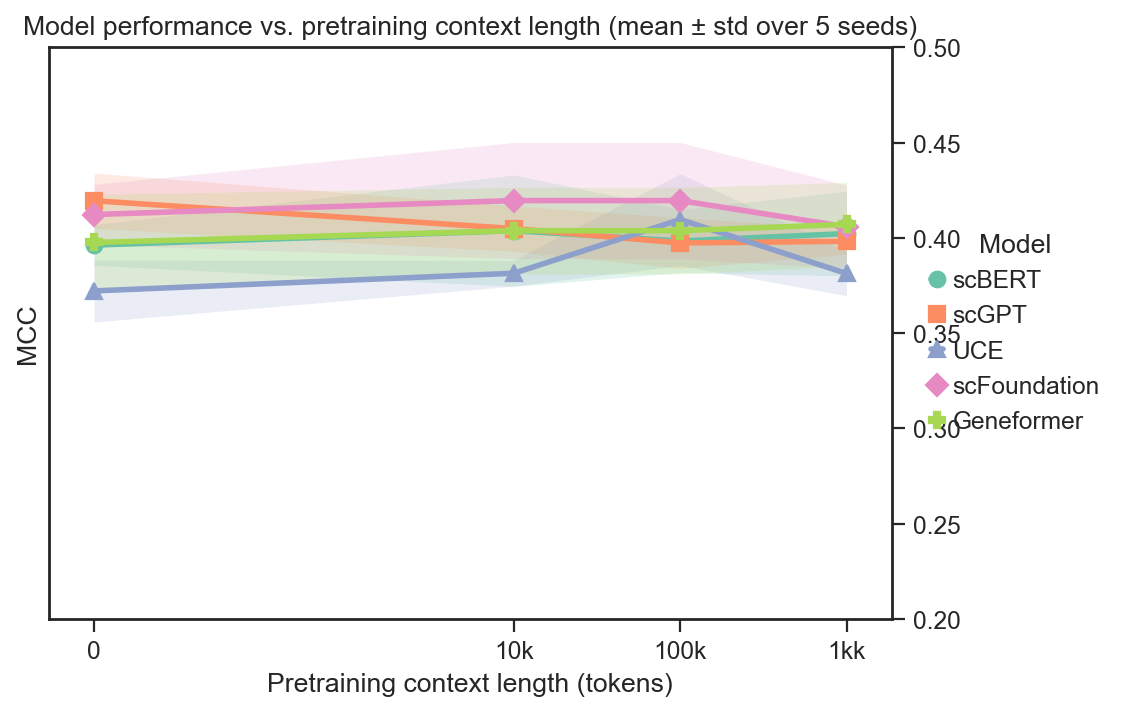

In [17]:
metric_name = "MCC"

x_full = np.array([0, 10_000, 100_000, 1_000_000], dtype=float)
xticks = x_full
xticklabels = ["0", "10k", "100k", "1M"]

order = ["scbert", "scgpt", "uce", "scfound", "geneformer"]
display = {"scbert":"scBERT","scgpt":"scGPT","uce":"UCE","scfound":"scFoundation","geneformer":"Geneformer"}

palette = sns.color_palette("Set2", n_colors=len(order))
markers = ["o","s","^","D","P"]

plt.figure(figsize=(7.2, 4.6))

plt.xscale("symlog", linthresh=5_000, linscale=2.0)

plt.margins(x=0.06)

ax = plt.gca()
ax.xaxis.set_major_locator(FixedLocator([0, 10_000, 100_000, 1_000_000]))
ax.xaxis.set_minor_locator(FixedLocator([20_000, 50_000, 200_000, 500_000]))

for (k, color, mk) in zip(order, palette, markers):
    # Means across seeds
    means_0     = np.mean(mcc_no_pretrain[k])
    means_10k   = np.mean(mcc_10k[k])
    means_100k  = np.mean(mcc_100k[k])
    means_1M    = np.mean(mcc_1mill[k])
    y = np.array([means_0, means_10k, means_100k, means_1M], dtype=float)

    s0    = np.std(mcc_no_pretrain[k], ddof=1)
    s10k  = np.std(mcc_10k[k], ddof=1)
    s100k = np.std(mcc_100k[k], ddof=1)
    s1M   = np.std(mcc_1mill[k], ddof=1)
    y_std = np.array([s0, s10k, s100k, s1M], dtype=float)

    # Plot the mean line
    plt.plot(x_full, y, marker=mk, linewidth=2.5, markersize=7,
             label=display[k], color=color, zorder=3)

    y_lo = y - y_std
    y_hi = y + y_std
    plt.fill_between(
        x_full, y_lo, y_hi,
        color=color, alpha=0.18, linewidth=0, zorder=2
    )

ax.set_ylim(0.2, 0.50)
ax.set_yticks([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
ax.set_yticklabels(['0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50'])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

ax.minorticks_off()  
ax.tick_params(axis='y', which='major', length=6, width=1, direction='out')
ax.tick_params(axis='x', which='major', length=6, width=1, direction='out')

ax.spines['right'].set_visible(True)
ax.yaxis.set_ticks_position('right')

plt.title("Model performance vs. pretraining context length (mean ± std over 5 seeds)")
plt.xlabel("Pretraining context length (tokens)")
plt.ylabel(metric_name)
plt.ylim([0.2, 0.5])

plt.xticks(xticks, labels=xticklabels)
ax.spines['bottom'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')  # draw ticks on bottom, not top

ax.tick_params(axis='x', which='major',
               bottom=True, top=False, length=6, width=1, direction='out')

ax.xaxis.set_major_formatter(
    FuncFormatter(lambda v, _: "0" if v == 0 else f"{int(v):,}".replace(",000","k").replace("1,000k","1M"))
)

plt.legend(title="Model", bbox_to_anchor=(1.02, 0.5), loc="center left", frameon=False)
plt.tight_layout()

out = "/path/to/file.pdf"
plt.savefig(out, dpi=300, bbox_inches="tight")
plt.show()
print("Saved to:", out)


<h2>Panel D</h2>

In [ ]:
#scbert
test_adata = sc.read_h5ad('/path/to/adata.h5ad')

sc.pl.embedding(
    test_adata,
    basis="umap",  # this accesses obsm["X_umap"]
    color="cell_type",
    show=True,
    save="_umap.pdf"
)

<h2>Panel E</h2>

In [ ]:
# Connect to the run
api = wandb.Api()
run = api.run("/path/to/run")

# Get confusion matrix metadata from the summary
cm_info = run.summary["test_confusion_matrix_table"]
artifact_file = run.file(cm_info["path"]).download(exist_ok=True)

# Load the JSON file
with open(artifact_file.name, "r") as f:
    table_data = json.load(f)

# Reconstruct DataFrame
columns = table_data["columns"]
data = table_data["data"]
df = pd.DataFrame(data, columns=columns)

# Pivot into square confusion matrix
df_pivot = df.pivot(index="Actual", columns="Predicted", values="nPredictions").fillna(0)
normalized_df = df_pivot.div(df_pivot.sum(axis=1), axis=0).fillna(0)

# Plot
plt.figure(figsize=(6, 6))
sns.heatmap(
    normalized_df,
    annot=False,
    cmap="Reds",
    xticklabels=df_pivot.columns,
    yticklabels=df_pivot.index,
    square=True,
    linewidths=0.5,
    linecolor="black",
    cbar=True
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.tight_layout()
plt.savefig("/path/to/confusion.pdf", format="pdf", bbox_inches="tight")
plt.show()


<h2>Panel F</h2>

In [ ]:
context_lengths = [256, 512, 1024, 2048, 4096]

results_seeds = {
    "scBERT": np.array([
        [0.3714, 0.3336, 0.3992, 0.3892, 0.4091],  # seed 1
        [0.3732, 0.4023, 0.3856, 0.3707, 0.4309],  # seed 2
        [0.3681, 0.3972, 0.4138, 0.415, 0.377],  # seed 3
        [0.3467, 0.3725, 0.3671, 0.3978, 0.3788],  # seed 4
        [0.3442, 0.3879, 0.4075, 0.3962, 0.3402],  # seed 5
    ]),
    "scGPT": np.array([
        [0.3328, 0.3558, 0.3967, 0.3917, 0.4196],
        [0.3581, 0.3659, 0.3837, 0.3838, 0.4132],
        [0.3636, 0.373, 0.4073, 0.4574, 0.4435],
        [0.358, 0.3894, 0.3969, 0.4138, 0.4663],
        [0.3513, 0.3733, 0.4111, 0.3975, 0.3831],
    ]),
    "UCE": np.array([
        [0.3176, 0.3366, 0.3594, 0.3737, 0.3224],
        [0.3201, 0.3391, 0.3468, 0.3715, 0.3536],
        [0.2683, 0.3217, 0.3426, 0.3454, 0.3292],
        [0.3226, 0.3417, 0.3561, 0.3843, 0.3107],
        [0.3146, 0.3358, 0.3566, 0.3862, 0.3506],
    ]),
    "scFoundation": np.array([
        [0.3559, 0.3837, 0.4069, 0.4631, 0.4361],
        [0.3757, 0.3759, 0.373, 0.4339, 0.4823],
        [0.3522, 0.3648, 0.4304, 0.4222, 0.4396],
        [0.371, 0.4045, 0.4091, 0.4342, 0.4365],
        [0.3371, 0.3735, 0.3833, 0.4328, 0.4023],
    ]),
    "Geneformer": np.array([
        [0.4435, 0.4216, 0.4249, 0.4054, 0.4228],
        [0.4198, 0.4362, 0.3765, 0.4046, 0.3817],
        [0.4471, 0.4167, 0.3912, 0.3948, 0.3747],
        [0.4023, 0.4324, 0.4112, 0.3992, 0.4265],
        [0.4422, 0.409, 0.3861, 0.394, 0.4127],
    ]),
}

In [ ]:
metric_name = "Score"  # e.g., "MCC", "Accuracy", etc.

def compute_yerr(seeds_2d, mode="ci90"):
    """
    seeds_2d: shape (n_seeds, n_points), e.g. (5, 3)
    mode: 'std' | 'sem' | 'ci95'  (default 95% CI using Student-t for n=5)
    """
    seeds_2d = np.asarray(seeds_2d, dtype=float)
    n = seeds_2d.shape[0]
    std = np.nanstd(seeds_2d, axis=0, ddof=1)
    sem = std / np.sqrt(n)

    if n == 5:
        tcrit = 2.132
    else:
        tcrit = 1.645  # normal approx for 90%
    return sem * tcrit


palette = sns.color_palette("Set2", n_colors=len(results_seeds))

x = np.asarray(context_lengths)
plt.figure(figsize=(8, 5))

plt.xscale("log", base=2)

for (model, seeds), color in zip(results_seeds.items(), palette):
    seeds = np.asarray(seeds, dtype=float)
    mean = np.nanmean(seeds, axis=0)
    yerr = compute_yerr(seeds, mode="ci90")

    plt.plot(x, mean, marker="o", linewidth=2, label=model, color=color)
    plt.fill_between(x, mean - yerr, mean + yerr, alpha=0.25, color=color)

ax = plt.gca()

ax.set_xticks(x)
ax.set_xticklabels([str(v) for v in context_lengths])

ax.set_ylim(0.28, 0.47)
ax.set_yticks([0.30, 0.35, 0.40, 0.45])
ax.set_yticklabels(['0.30', '0.35', '0.40', '0.45'])

ax.minorticks_off()
ax.tick_params(axis='x', which='major', bottom=True, top=False, length=6, width=1, direction='out')
ax.tick_params(axis='y', which='major', left=True, right=False, length=6, width=1, direction='out')

ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title("Model performance vs. context length (mean ± 90% CI, 5 seeds)")
plt.xlabel("Context length")
plt.ylabel(metric_name)
plt.legend(title="Model", bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
plt.tight_layout()

plt.savefig("/work/magroup/ehaber/heimdall_fig3/panelC.pdf", dpi=300, bbox_inches="tight")
plt.show()


<h2>Panel G</h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# === Example data for Fg (yours) ===
Fg_scores = {
#    "identity": [0.47484958, 0.47750512, 0.46222159],
    "gene2vec": [0.36391324, 0.35936183, 0.37312865, 0.41757336, 0.3568548, 0.41563383],
    "esm2":    [0.37215552, 0.39167327, 0.41621011, 0.41560709, 0.42664528, 0.47633702],
    "hyenadna": [0.37809873, 0.41829485, 0.40411648, 0.38854873, 0.41608381, 0.44760552],
    "genept": [0.41670576, 0.40613258, 0.37552035, 0.42905542, 0.42671737, 0.43150282]
}

Fe_scores = {
   "scbert_bin": [0.38550884, 0.44001064, 0.3915917, 0.38589969, 0.40149206, 0.43508965],
    "scgpt_bin": [0.3993139, 0.3956804, 0.4287228, 0.43141997, 0.39669955, 0.43265679],
    "autobin":    [0.36623725, 0.42235968, 0.35631591, 0.40811434, 0.355113, 0.46492904],
    "continuous": [0.43526772, 0.42490217, 0.4368923, 0.39084461, 0.42280227, 0.36493847]
}

Fo_scores = {
   "randsort": [0.35110581, 0.3390303, 0.31049874, 0.34988305, 0.34420878, 0.36229005],
 #   "exprsort": [0.53645962, 0.56476104, 0.51092452],
    "chromsort":    [0.36119759, 0.37244993, 0.37661853, 0.34657523, 0.35873371, 0.38731629],
}

Fs_scores = {
    "weighted": [0.39351454, 0.38432217, 0.34487164, 0.39363545, 0.38724756, 0.3744204],
#   "trunc": [0.56331319, 0.53061253, 0.56398135],
}

# Optional: add Fe / Fo when ready
scores_by_group = {"Fg": Fg_scores, "Fe": Fe_scores, "Fo": Fo_scores, "Fs": Fs_scores}  # , "Fe": Fe_scores, "Fo": Fo_scores

method_order_by_group = {
    "Fg": ["gene2vec", "esm2", "hyenadna", "genept"],
    "Fe": ["scbert_bin", "scgpt_bin", "autobin", "continuous"],
    "Fo": ["randsort", "chromsort"], 
    "Fs": ["weighted"]
}

pretty_name_by_group = {
    "Fg": {
        "gene2vec": "Gene2vec",
        "esm2": "ESM2",
        "hyenadna": "HyenaDNA",
        "genept": "GenePT",
    },
    "Fe": {
        "scbert_bin":     "Integer binning",
        "scgpt_bin":      "Quantitle binning",
        "autobin":        "Autobinning",
        "continuous":    "Continuous"    },
    "Fo": {
        "randsort":      "Random sort",
        "chromsort":        "Chromosome sort"   },
    "Fs": {
        "weighted":     "Weighted sample"},
}


In [ ]:
def paired_tests_vs_baseline(group_dict, baseline_vals):
    rows = []
    b = np.asarray(baseline_vals, dtype=float)
    for method, vals in group_dict.items():
        x = np.asarray(vals, dtype=float)
        assert x.shape == b.shape, f"Seed counts/order must match for {method}."
        d = x - b  # paired differences

        # tests
        tstat, p_t = ttest_rel(x, b)
        try:
            wstat, p_w = wilcoxon(d)
        except ValueError:
            wstat, p_w = np.nan, 1.0

        # Shapiro–Wilk on differences (normality assumption for paired t-test)
        try:
            W, p_sw = shapiro(d)
        except Exception:
            W, p_sw = np.nan, np.nan

        rows.append({
            "method": method, "p_t": p_t, "p_w": p_w,
            "shapiro_W": W, "shapiro_p": p_sw
        })

    df = pd.DataFrame(rows)

    # Holm correction per group (for t and Wilcoxon p-values)
    for col in ["p_t", "p_w"]:
        rej, p_adj, _, _ = multipletests(df[col].values, method="holm")
        df[col + "_holm"] = p_adj
        df[col + "_rej"]  = rej

    return df


def p_to_stars(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return ''


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

def plot_grouped_mcc(
    groups_dict,
    method_order_by_group=None,
    pretty_name_by_group=None,
    title="Ablations by Module (Fg / Fe / Fo / Fs)",
    save_prefix=None,
    baseline_scores=None,
    baseline_label="Linear baseline",
    baseline_position="bottom",           
    group_order=("Fg", "Fe", "Fo", "Fs"),
    stars_by_key=None,
    xlim=(0.35, 0.65),
    mean_line_label="Baseline mean",      
    xticks=None,
    xtick_step=0.05,
    minor_xtick_step=None
):
    """
    Grouped horizontal bar plot with optional baseline row and stars.
    - Baseline mean line styling and visibility are fixed internally (no public params).
    """

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype']  = 42

    # Internal styling (since we removed public params)
    _BASELINE_STYLE = {"facecolor": "white", "edgecolor": "black", "linewidth": 0.8}
    _SHOW_MEAN_LINE = True
    _MEAN_LINE_STYLE = {"linestyle": "--", "linewidth": 1.5, "color": "red", "alpha": 1.0}

    present_groups = [g for g in group_order if g in groups_dict]

    group_palette = dict(zip(present_groups, sns.color_palette("Set2", len(present_groups)))) if present_groups else {}

    # per-group method order
    group_methods = {}
    for g in present_groups:
        default = list(groups_dict[g].keys())
        group_methods[g] = method_order_by_group.get(g, default) if method_order_by_group else default

    # baseline stats
    b_mean = b_std = None
    if baseline_scores is not None and len(baseline_scores) > 0:
        b_arr = np.asarray(baseline_scores, dtype=float)
        b_mean = float(np.nanmean(b_arr))
        b_std  = float(np.nanstd(b_arr, ddof=1)) if len(b_arr) > 1 else 0.0

    BAR_H = 0.9
    GAP   = 0.6

    y_positions, y_labels, row_meta = [], [], []   # row_meta: ("__BASELINE__", None) or (group, method)
    y = 0.0

    def add_baseline_row():
        nonlocal y
        if b_mean is not None:
            y_positions.append(y); y_labels.append(baseline_label); row_meta.append(("__BASELINE__", None))
            y += BAR_H
            if baseline_position == "top" and present_groups:
                y += GAP

    if baseline_position == "top":
        add_baseline_row()

    for gi, g in enumerate(present_groups):
        for m in group_methods[g]:
            y_positions.append(y)
            pretty = (pretty_name_by_group or {}).get(g, {}).get(m, m.title())
            y_labels.append(pretty)
            row_meta.append((g, m))
            y += BAR_H
        if gi < len(present_groups) - 1:
            y += GAP

    if baseline_position == "bottom":
        if b_mean is not None and present_groups:
            y += GAP
        add_baseline_row()

    def _disable_clip_errorbar(eb):
        objs = []
        if eb is None:
            return
        if hasattr(eb, "lines") and eb.lines is not None:
            objs.extend(eb.lines if isinstance(eb.lines, (list, tuple)) else [eb.lines])
        if hasattr(eb, "caplines") and eb.caplines is not None:
            objs.extend(eb.caplines)
        if hasattr(eb, "barlinecols") and eb.barlinecols is not None:
            objs.extend(eb.barlinecols)
        for o in objs:
            try: o.set_clip_on(False)
            except Exception: pass

    fig, ax = plt.subplots(figsize=(6, 7), facecolor='white')

    if xlim is not None:
        ax.set_xlim(*xlim)
    xmin, xmax = ax.get_xlim()

    if xticks is not None:
        ax.set_xticks(xticks)
    elif xtick_step is not None:
        ax.xaxis.set_major_locator(mticker.MultipleLocator(xtick_step))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

    if minor_xtick_step:
        ax.xaxis.set_minor_locator(mticker.MultipleLocator(minor_xtick_step))
    else:
        ax.minorticks_off()

    ax.spines['bottom'].set_visible(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis='x', which='major', bottom=True, top=False,
                   length=6, width=1, direction='out')
    if minor_xtick_step:
        ax.tick_params(axis='x', which='minor', bottom=True, top=False,
                       length=3, width=0.8, direction='out')

    mean_line_handle = None
    if _SHOW_MEAN_LINE and (b_mean is not None):
        vline = ax.axvline(b_mean, **_MEAN_LINE_STYLE)
        vline.set_clip_on(False)
        mean_line_handle = Line2D([0], [0],
                                  linestyle=_MEAN_LINE_STYLE["linestyle"],
                                  linewidth=_MEAN_LINE_STYLE["linewidth"],
                                  color=_MEAN_LINE_STYLE["color"],
                                  alpha=_MEAN_LINE_STYLE["alpha"],
                                  label=mean_line_label)

    for y_val, meta in zip(y_positions, row_meta):
        g, m = meta
        if g == "__BASELINE__":
            width = max(b_mean - xmin, 0.0)
            ax.barh(y_val, width, left=xmin, height=BAR_H,
                    zorder=2, clip_on=False, **_BASELINE_STYLE)
            if b_std and b_std > 0:
                eb = ax.errorbar(b_mean, y_val, xerr=b_std, fmt='none',
                                 ecolor='black', elinewidth=1.2, capsize=3, zorder=3)
                _disable_clip_errorbar(eb)
            continue

        vals = np.asarray(groups_dict[g][m], dtype=float)
        mean = float(np.nanmean(vals))
        std  = float(np.nanstd(vals, ddof=1)) if len(vals) > 1 else 0.0
        color = group_palette.get(g, 'C0')

        width = max(mean - xmin, 0.0)
        ax.barh(y_val, width, left=xmin, height=BAR_H,
                color=color, edgecolor='black', linewidth=0.6,
                zorder=1, clip_on=False)

        if std > 0:
            eb = ax.errorbar(mean, y_val, xerr=std, fmt='none',
                             ecolor='black', elinewidth=1.2, capsize=3, zorder=3)
            _disable_clip_errorbar(eb)

        # stars (if provided)
        if stars_by_key:
            stars = stars_by_key.get((g, m), '')
            if stars:
                dx = max(0.01 * (xmax - xmin), 1e-3)
                tx = min(mean + dx, xmax - 0.004 * (xmax - xmin))
                ha = 'right' if tx < mean + dx else 'left'
                ax.text(tx, y_val, stars, va='center', ha=ha,
                        fontsize=10, fontweight='bold', color='black',
                        zorder=4, clip_on=False)

    ax.set_yticks(y_positions)
    ax.set_yticklabels(y_labels)
    ax.set_xlabel("MCC")
    ax.set_ylabel("")
    ax.set_title(title)

    handles = [Patch(facecolor=group_palette[g], edgecolor='black', label=g) for g in present_groups]
    if b_mean is not None:
        handles.append(Patch(label=baseline_label,
                             facecolor=_BASELINE_STYLE["facecolor"],
                             edgecolor=_BASELINE_STYLE["edgecolor"]))
    if mean_line_handle is not None:
        handles.append(mean_line_handle)
    if handles:
        ax.legend(handles=handles, title="Groups", bbox_to_anchor=(1.02, 1),
                  loc='upper left', frameon=False)

    ax.margins(y=0)
    if y_positions:
        ax.set_ylim(y_positions[0] - BAR_H/2, y_positions[-1] + BAR_H/2)

    # Keep left spine so y-ticks have an anchor
    ax.spines['left'].set_visible(True)

    # Save
    if save_prefix:
        plt.savefig(f"{save_prefix}.pdf", facecolor='white', bbox_inches='tight', pad_inches=0.02)
    plt.show()


In [ ]:
baseline = np.array([0.42487139, 0.37648052, 0.39124551, 0.41120481, 0.38607112, 0.41667768], dtype=float)
per_group_results = {g: paired_tests_vs_baseline(md, baseline) for g, md in scores_by_group.items()}

# Choose the adjusted p-value column powering the stars:
STAR_COL = "p_t_holm"   # or "p_w_holm" if you prefer Wilcoxon
stars_by_key = {(g, r["method"]): p_to_stars(r[STAR_COL])
                for g, df in per_group_results.items() for _, r in df.iterrows()}


plot_grouped_mcc(
    groups_dict=scores_by_group,
    method_order_by_group=method_order_by_group,
    group_order=("Fs", "Fo", "Fe","Fg"),
    pretty_name_by_group=pretty_name_by_group,
    baseline_scores= baseline,
    baseline_label="Geneformer-tok",
    baseline_position="top",         
    stars_by_key=stars_by_key,          
    xlim=(0.25, 0.50),
    save_prefix='/path'                   
)
